In [1]:
!pip install missingno
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [2]:
!pip install scipy

In [3]:
!pip install numpy scipy scikit-learn cython
!pip install numpy scipy scikit-learn
!pip install lightgbm
!pip install xgboost

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB 330.3 kB/s eta 0:00:09
   ---------------------------------------- 0.0/2.8 MB 330.3 kB/s eta 0:00:09
    --------------------------------------- 0.0/2.8 MB 219.4 kB/s eta 0:00:13
    --------------------------------------- 0.1/2.8 MB 273.8 kB/s eta 0:00:10
   - -------------------------------------- 0.1/2.8 MB 328.8 kB/s eta 0:00:09
   - -------------------------------------- 0.1/2.8 MB 309.1 kB/s eta 0:00:09
   - -------------------------------------- 0.1/2.8 MB 328.2 kB/s eta 0:00:09
   - -------------------------------------- 0.1/2.8 MB 300.4 kB/s eta 0:00:09
   - -------------------------------------- 0.1/2.8 MB 300.4 kB/s eta 0:00:09
   - -------------------------------------- 0.1/2.8 MB 300.4 kB/s eta 0:00:09
   -- ------------------------------------- 0.2/2.8 MB 308.5 kB/s eta 0:00:09
   -

In [4]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats

In [5]:
data = pd.read_csv("C://Users//hp//Desktop//Research Work//Heart Attack Prediction//Code//heart_2020_cleaned.csv")

In [6]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
data.describe().style.background_gradient(cmap = "summer")

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.371710,3.898366,7.097075
std,6.356100,7.950850,7.955235,1.436007
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


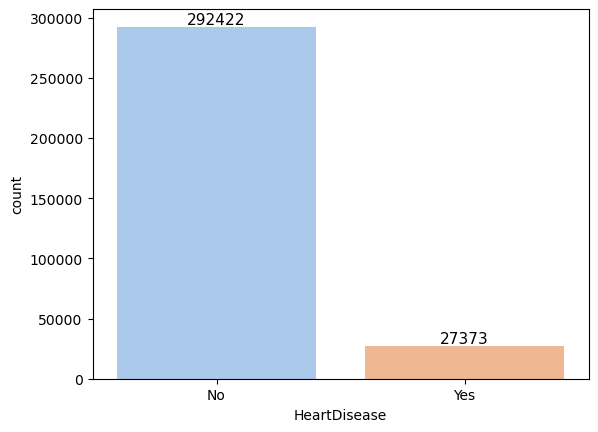

In [10]:
ax = sns.countplot(x='HeartDisease', data=data, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [11]:
for column_name in data.columns:
    unique_values = len(data[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3604' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


In [12]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [13]:
data1 = data.drop(columns=['Race','SkinCancer'])

In [14]:
data1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Yes,No,Fair,6.0,Yes,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,No,Yes,Very good,5.0,Yes,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,No,Yes,Good,6.0,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,No,No,Good,12.0,No,No


In [15]:
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
                      'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease']

Text(0.5, 0.98, 'Visualizing continuous columns')

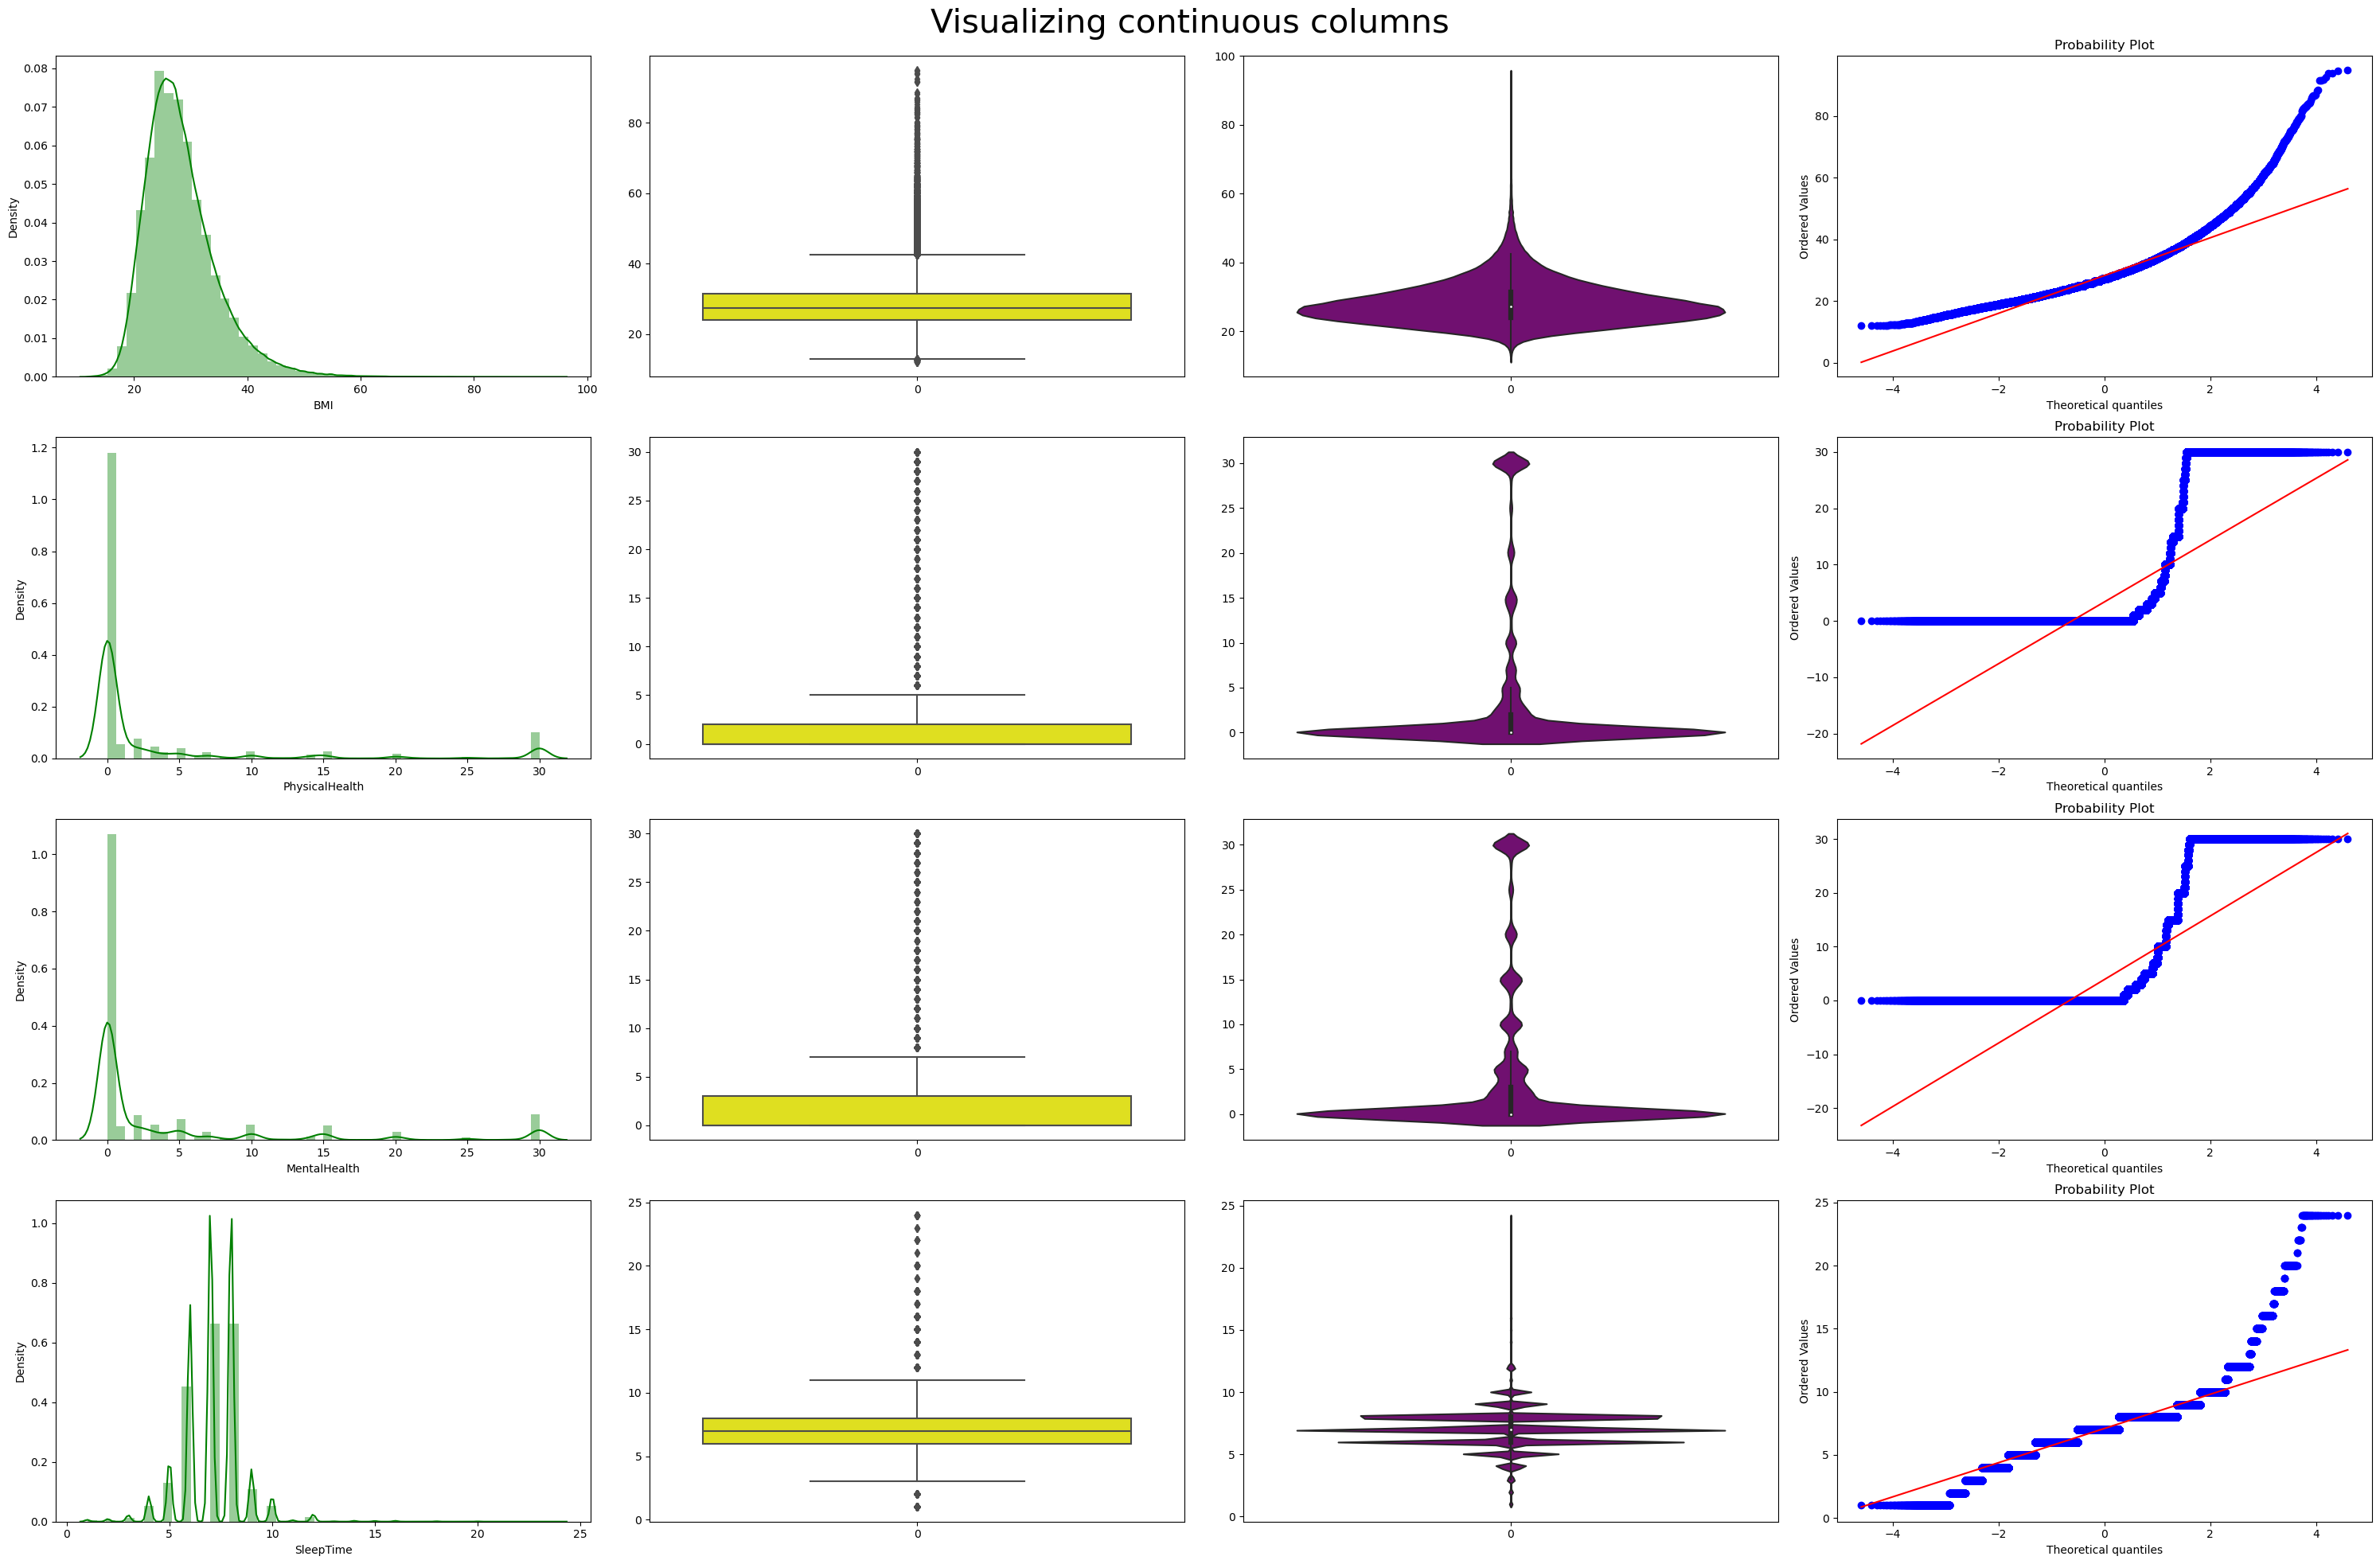

In [16]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(data1[i],ax=ax[index,0],color='green')
    sns.boxplot(data1[i],ax=ax[index,1],color='yellow')
    sns.violinplot(data1[i],ax=ax[index,2],color='purple')
    stats.probplot(data1[i],plot=ax[index,3])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns",fontsize=30)

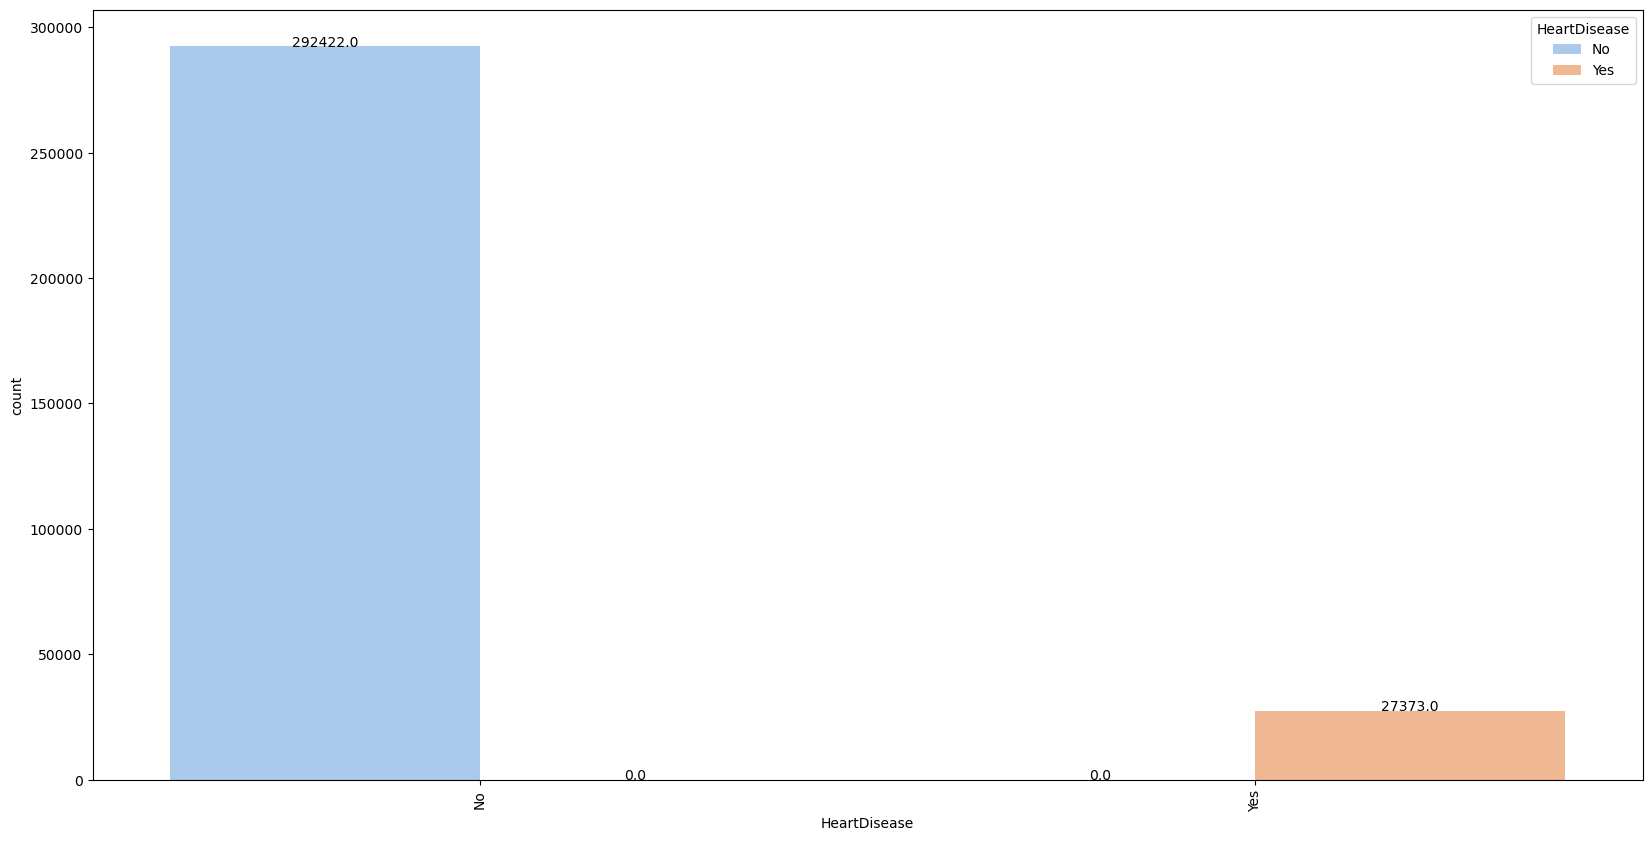

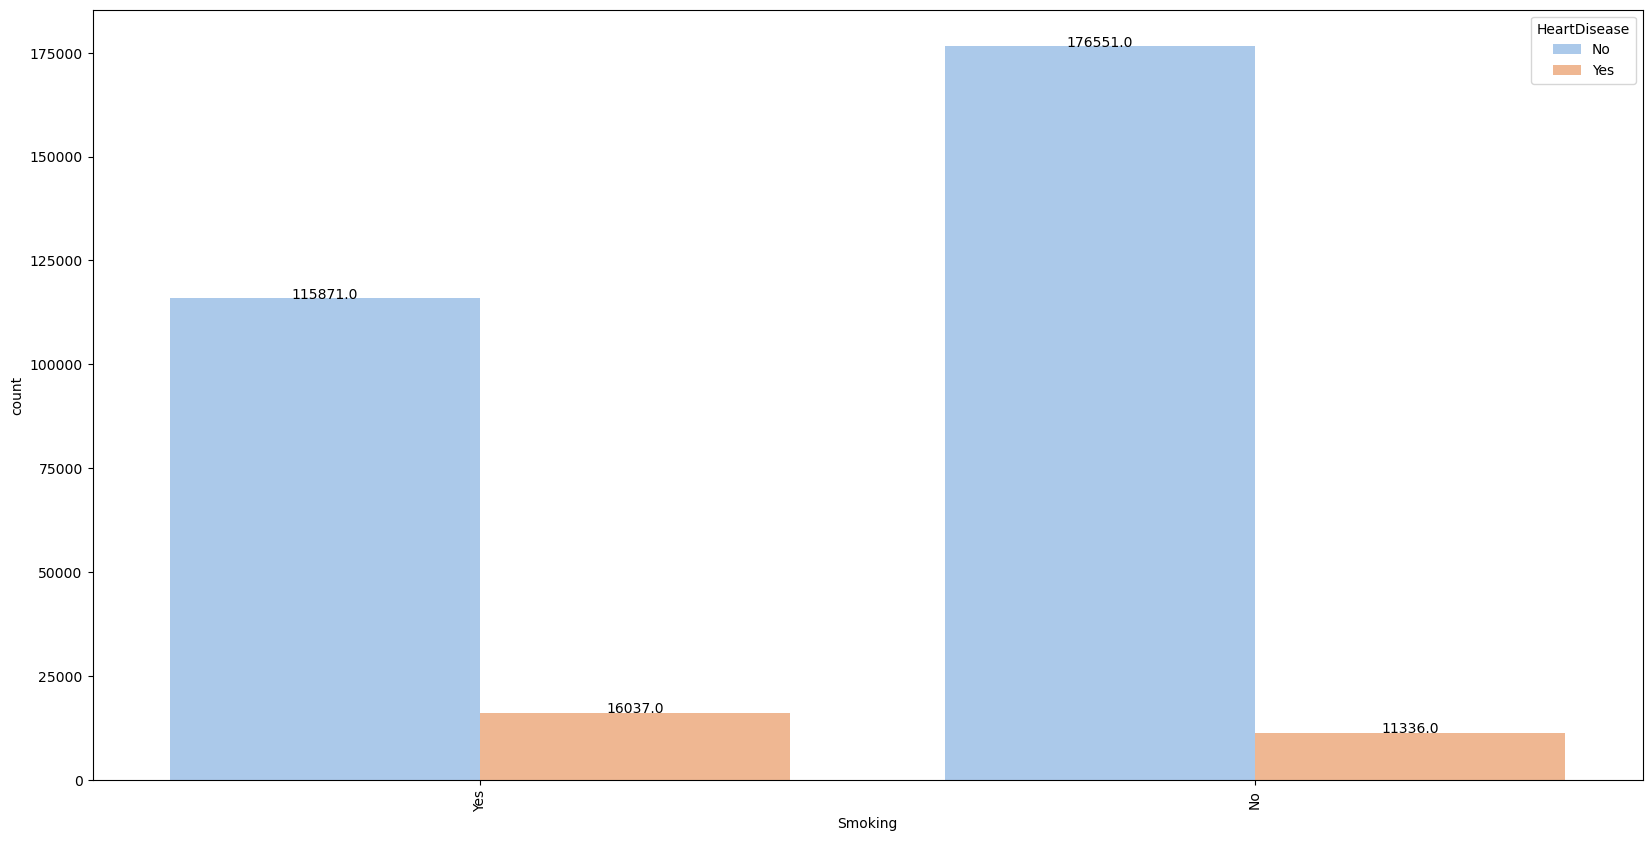

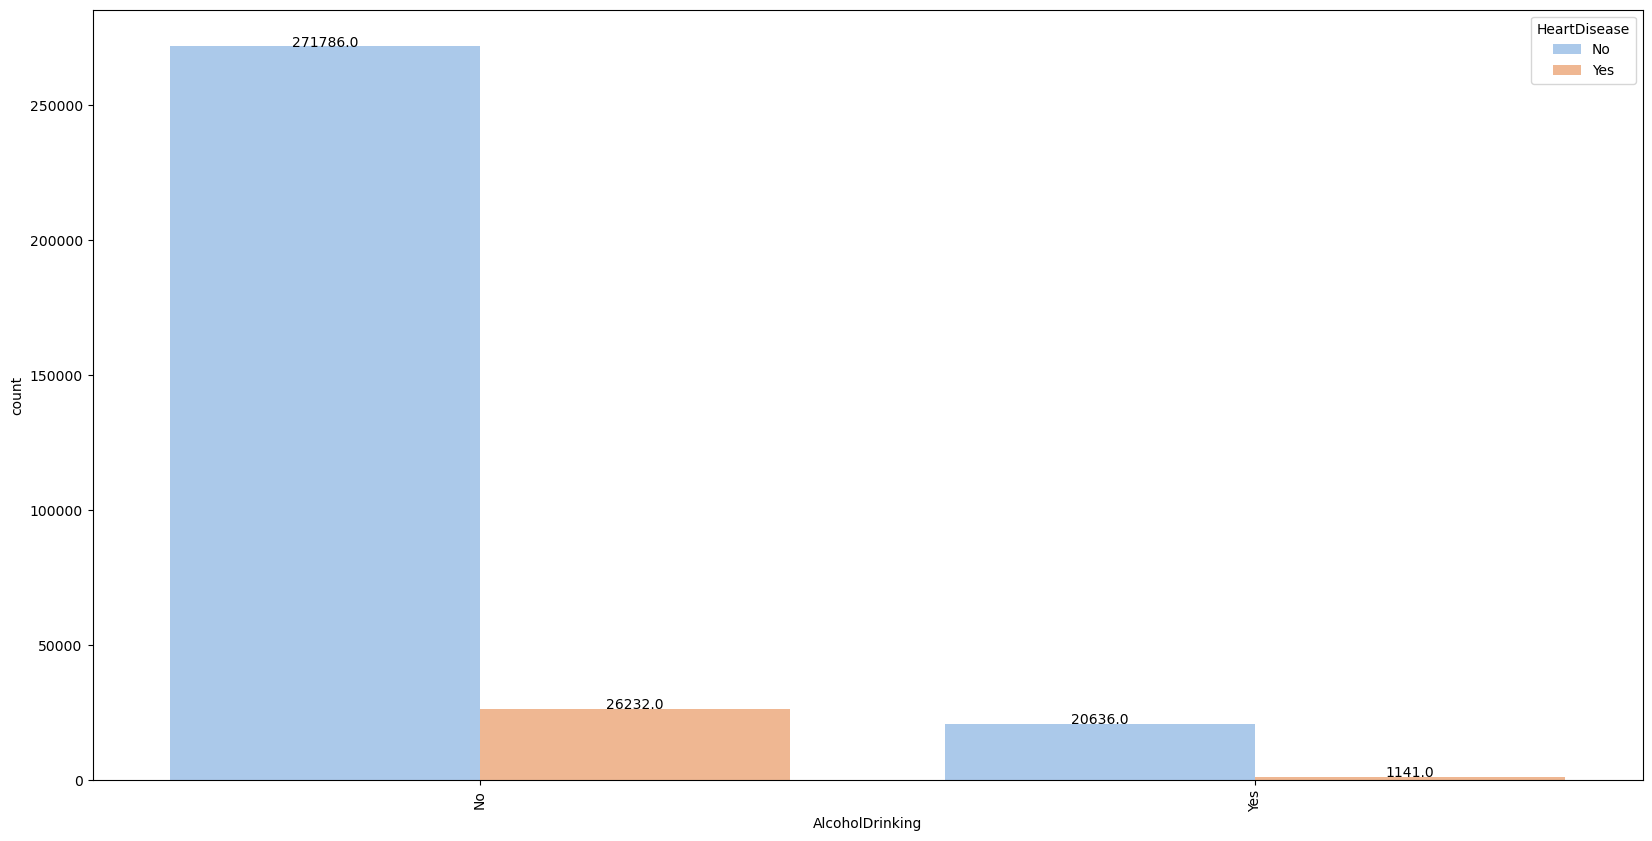

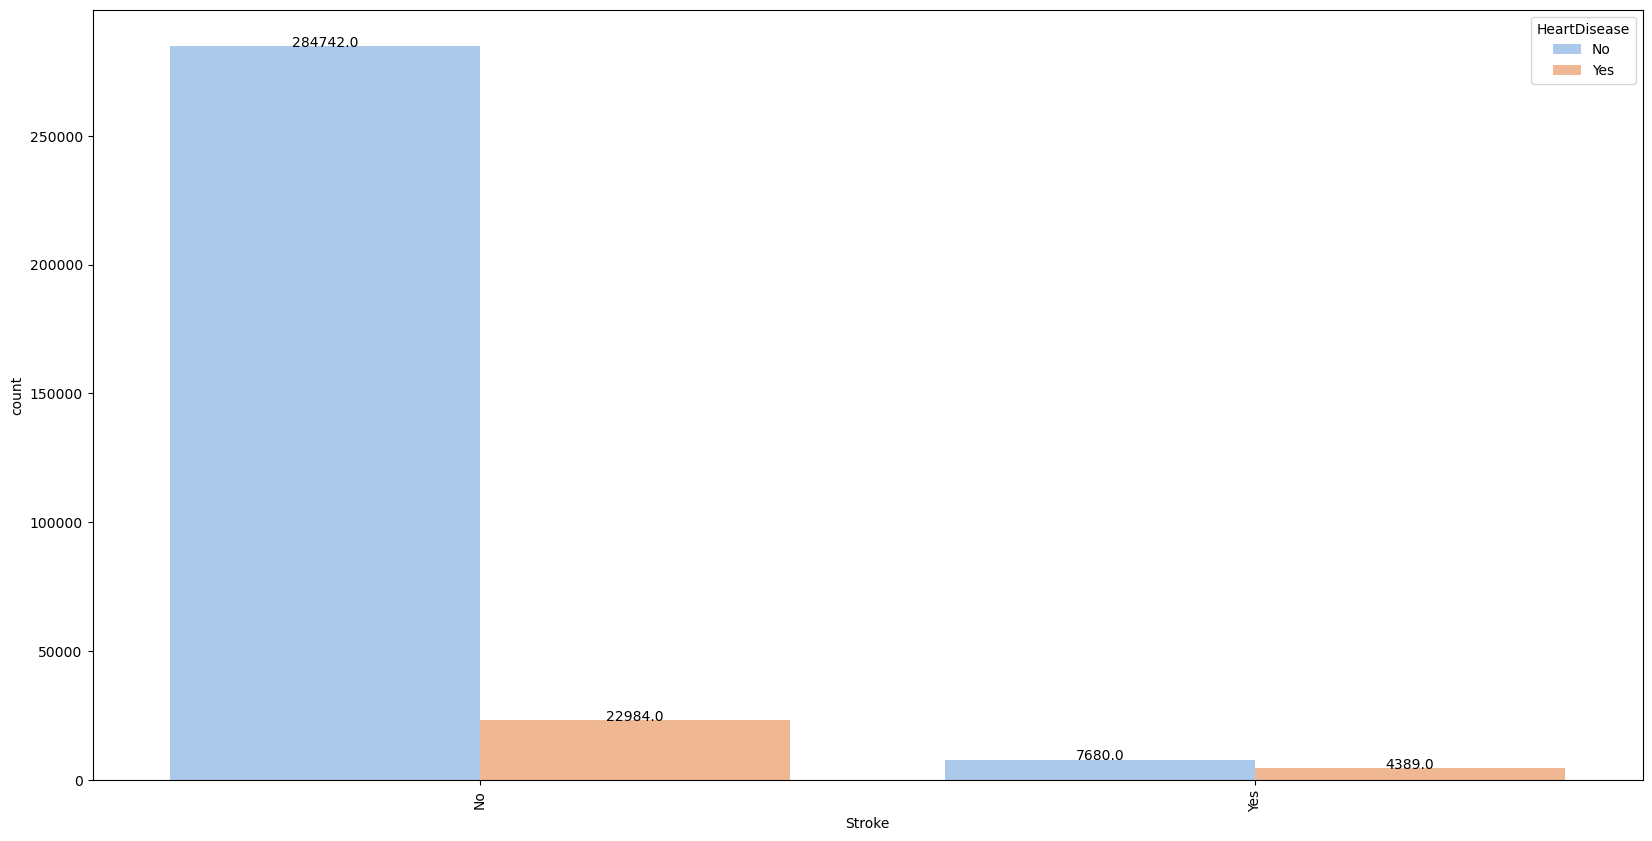

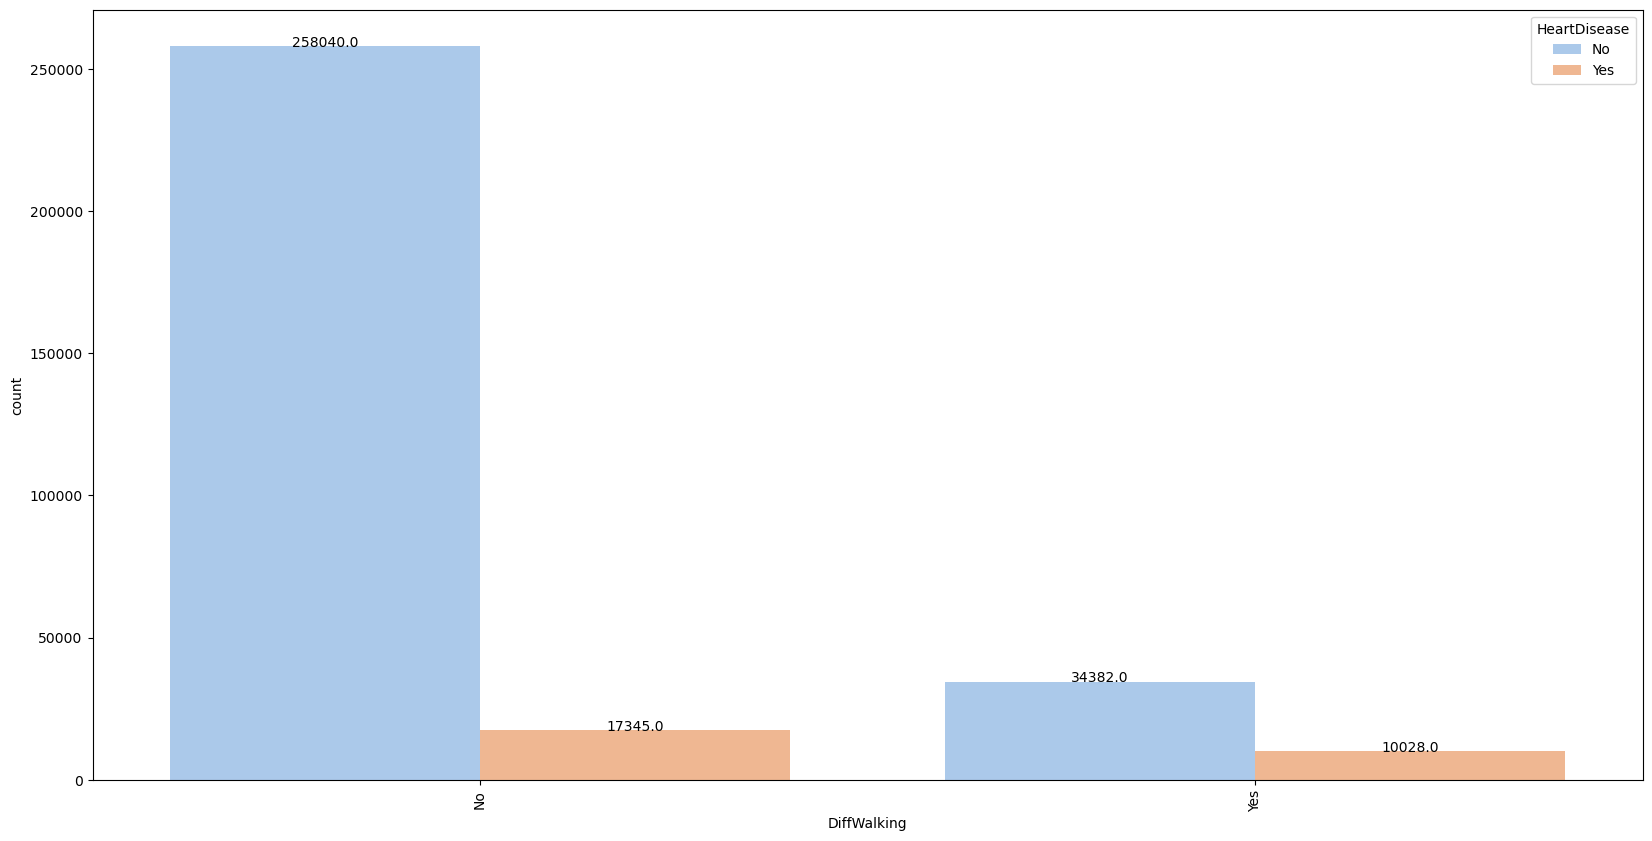

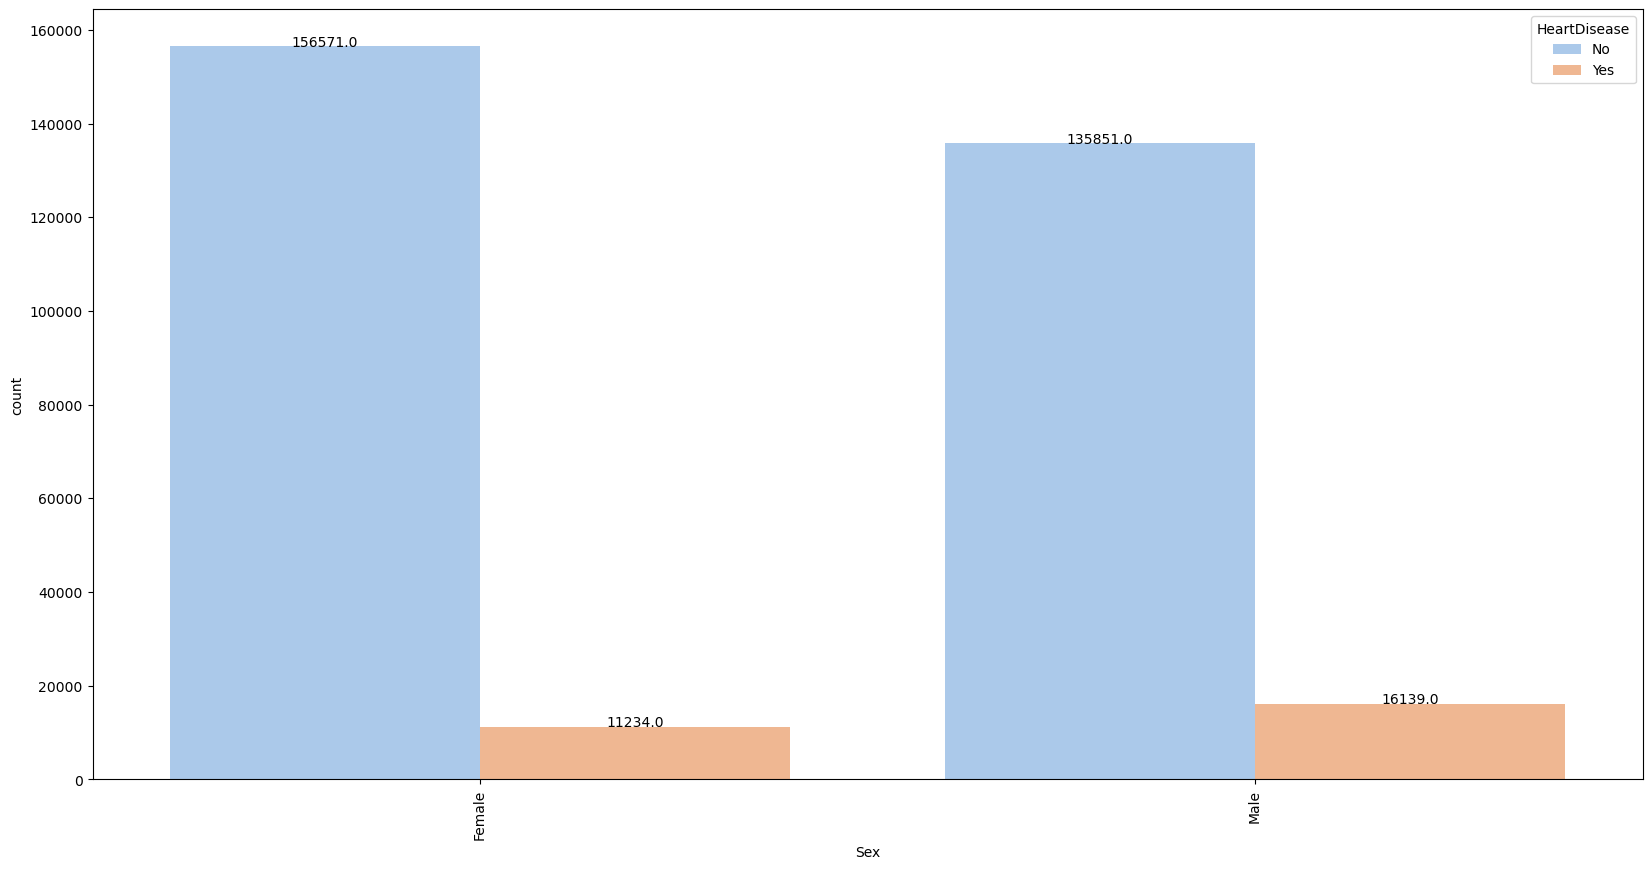

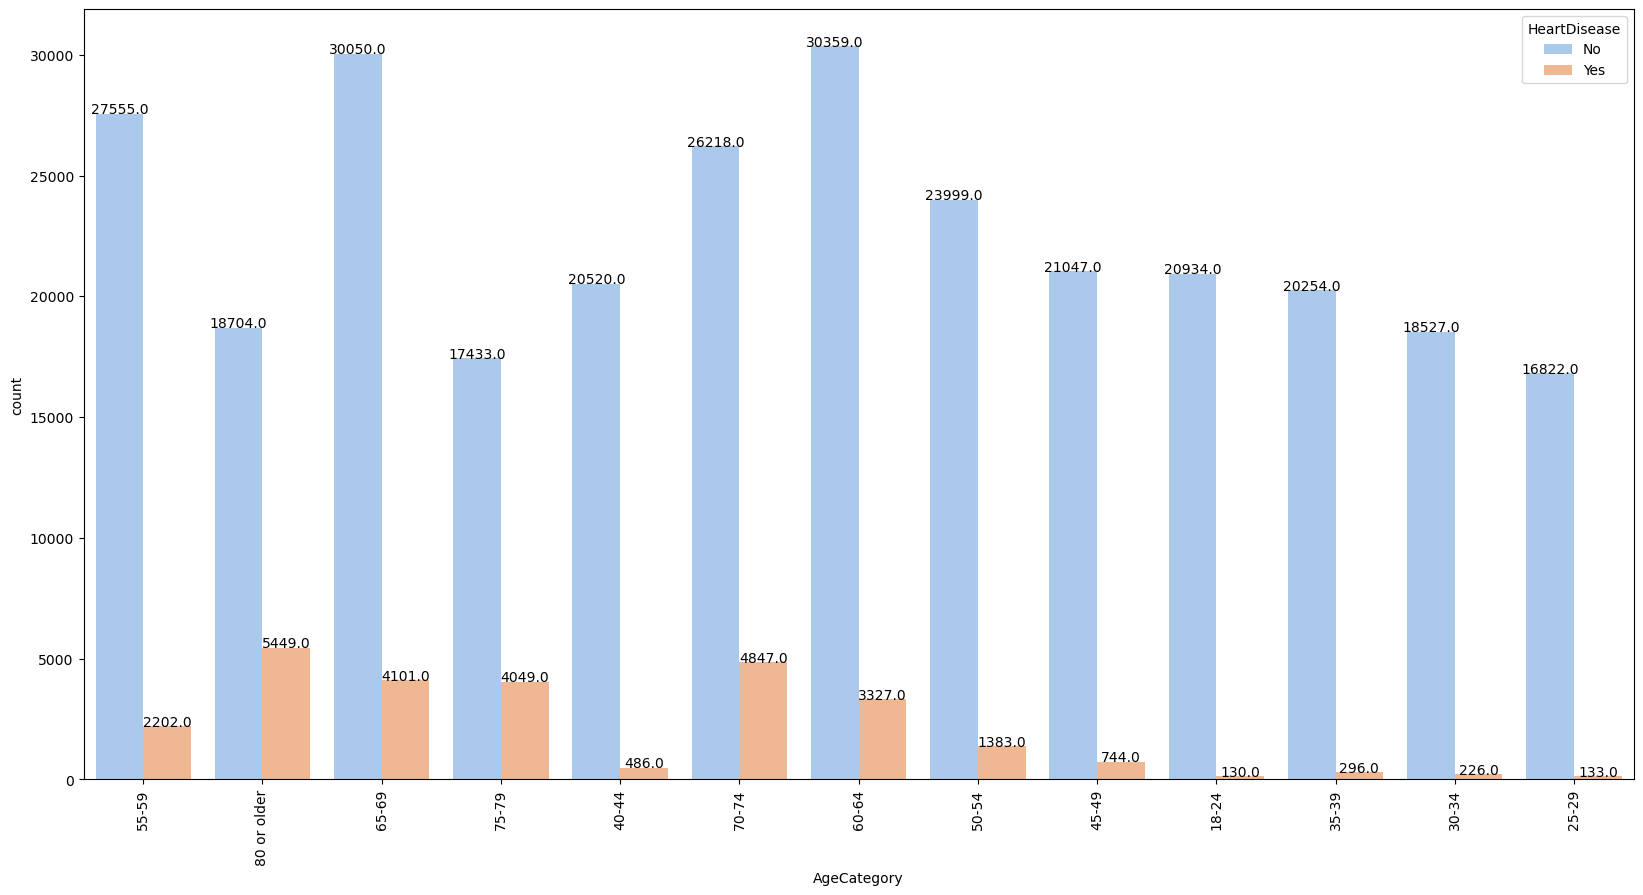

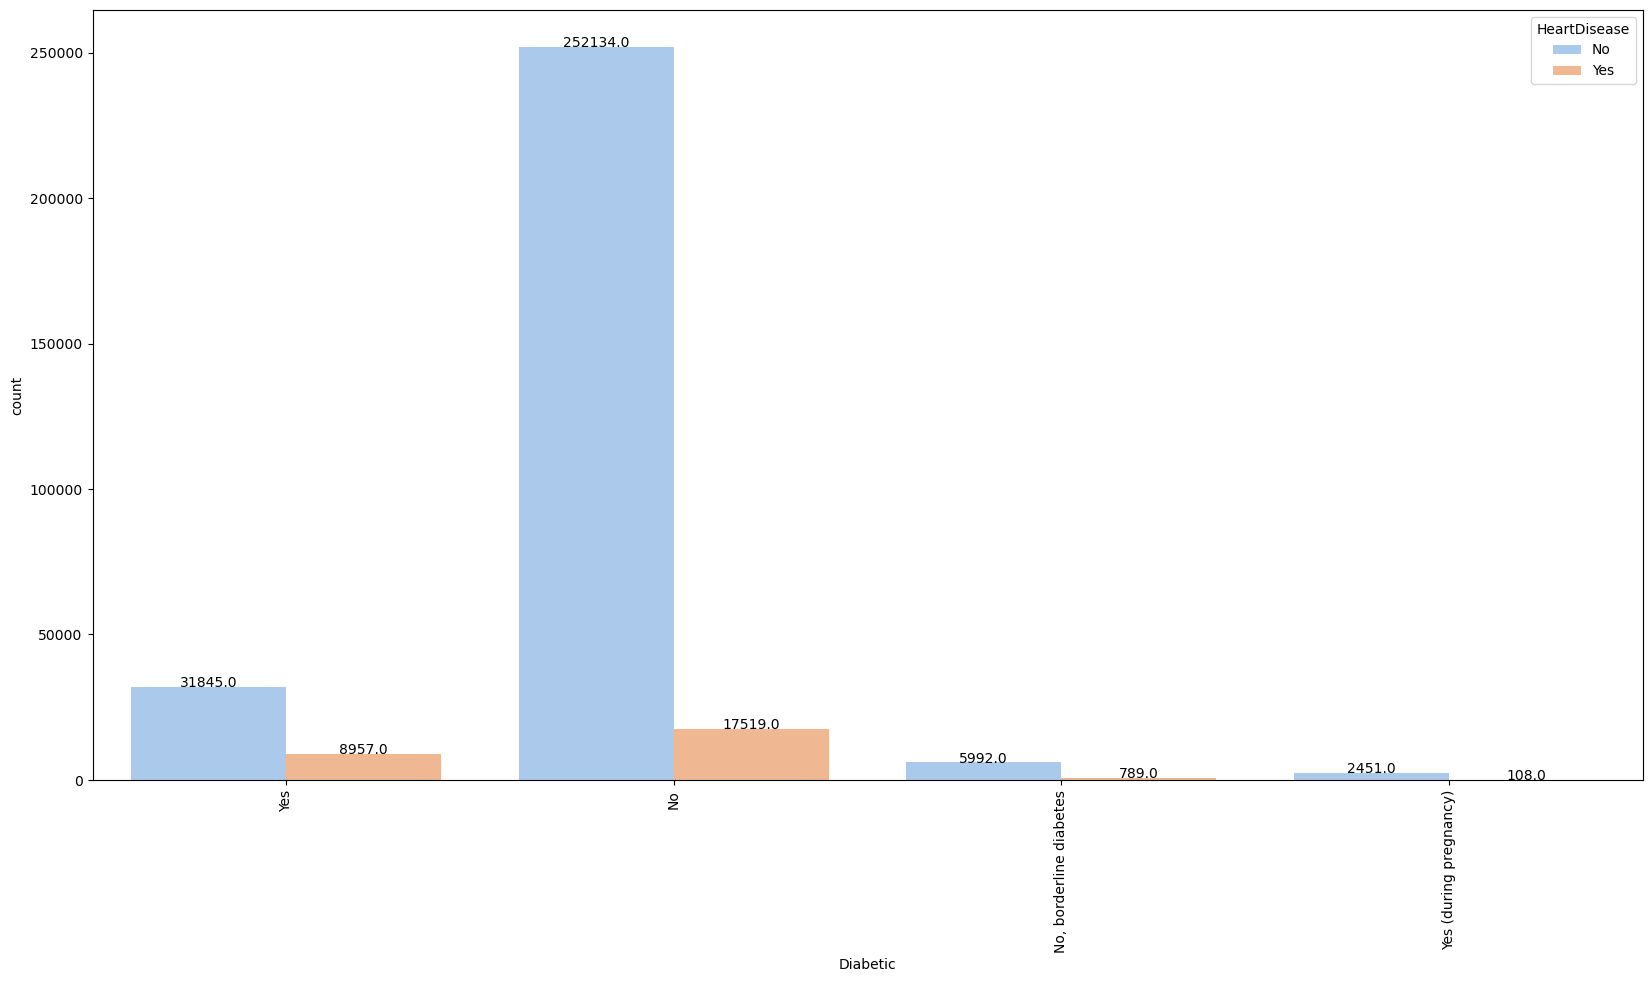

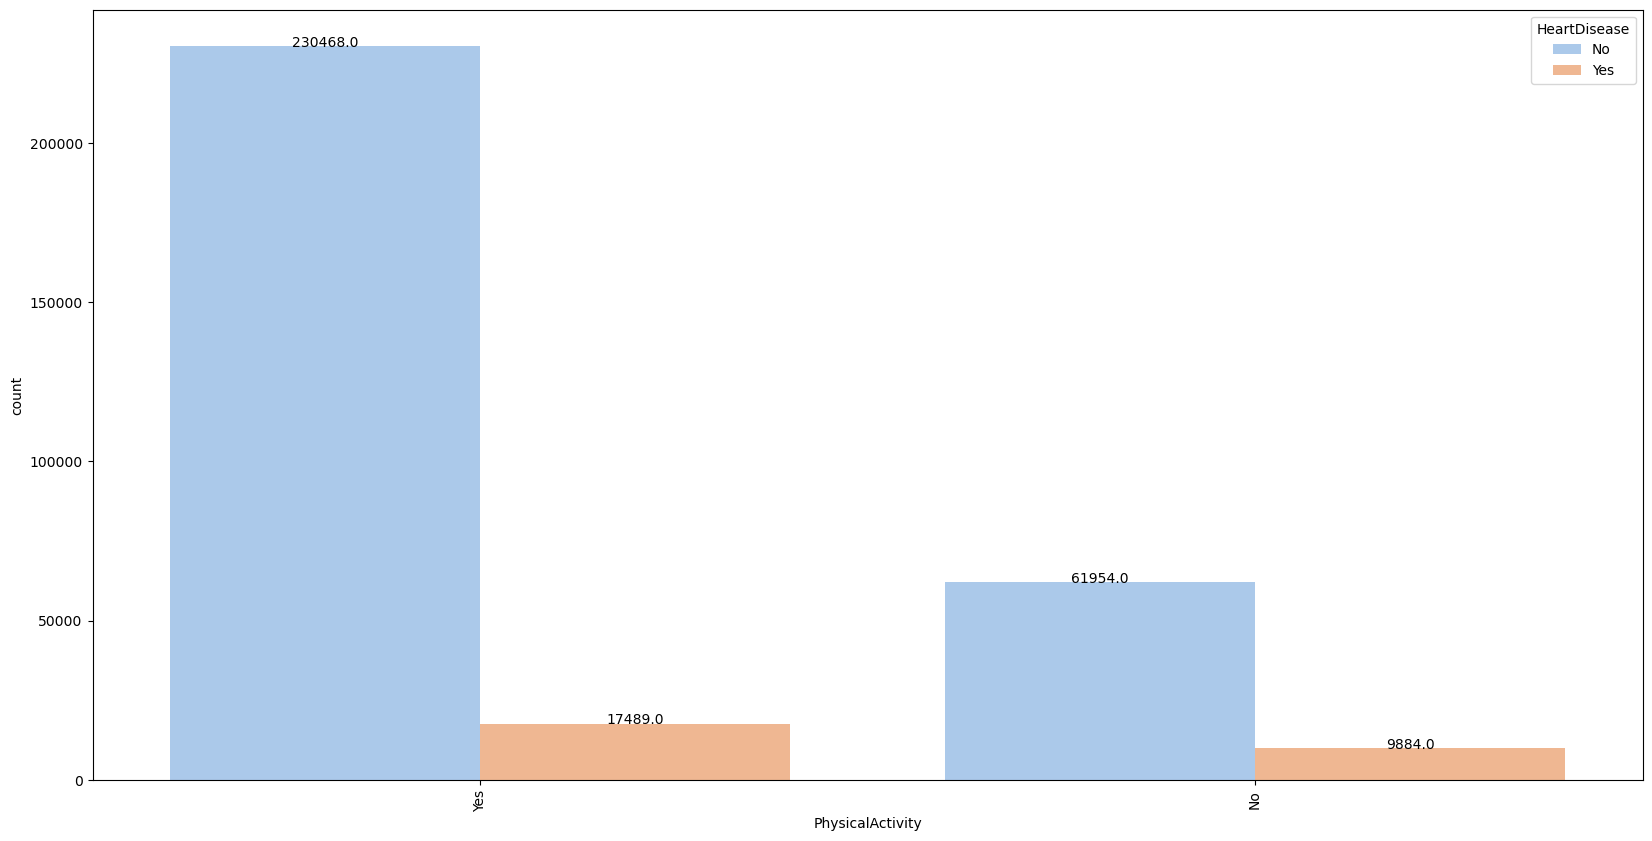

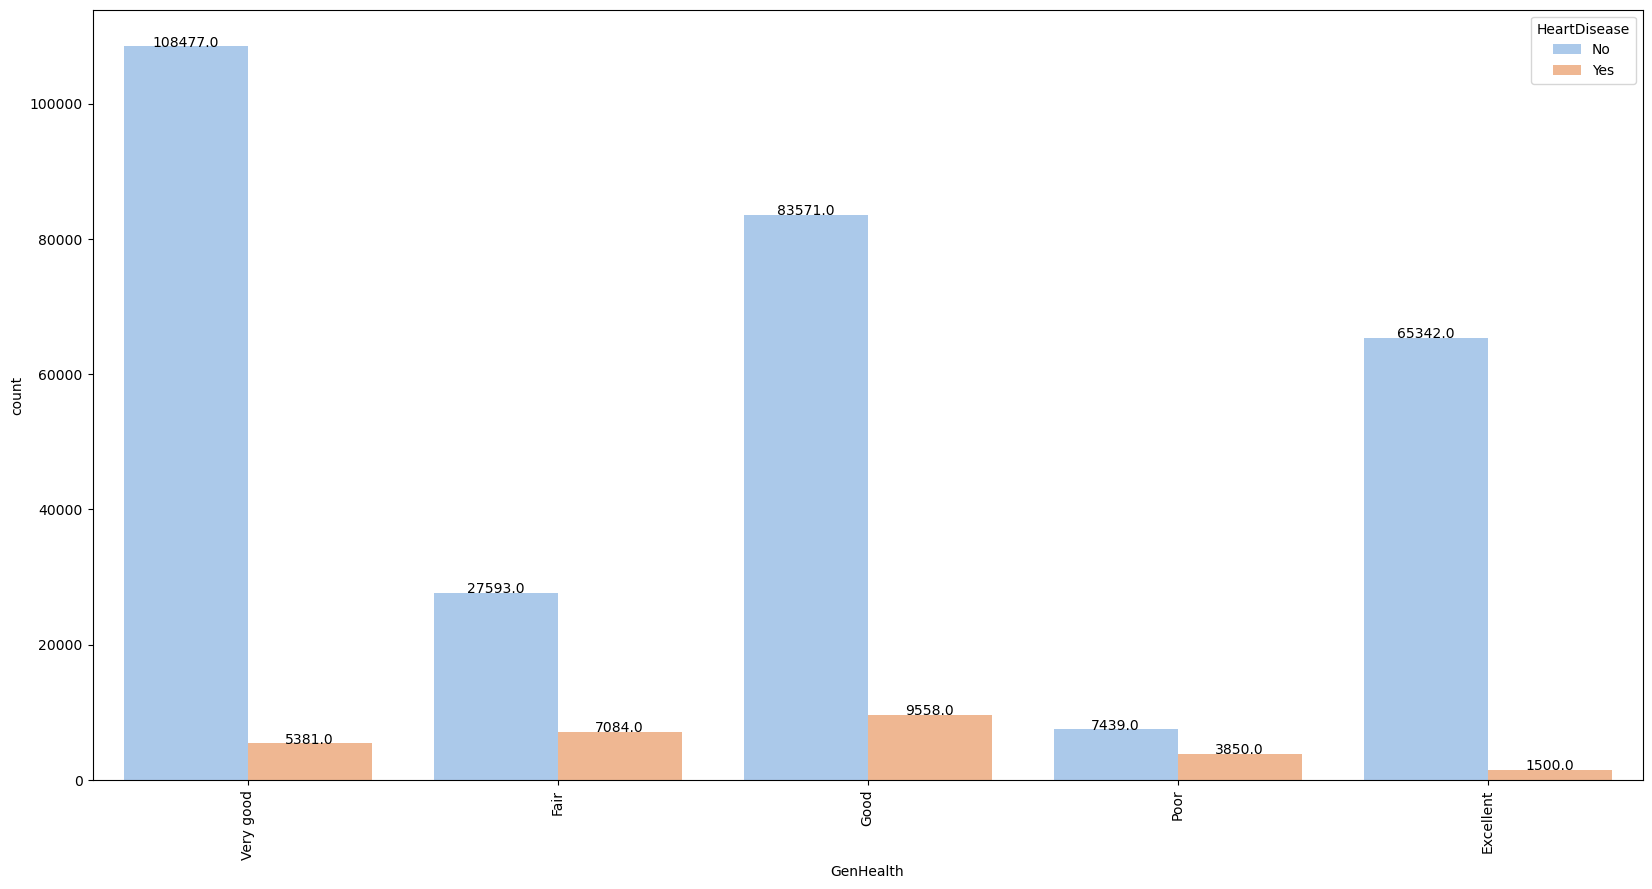

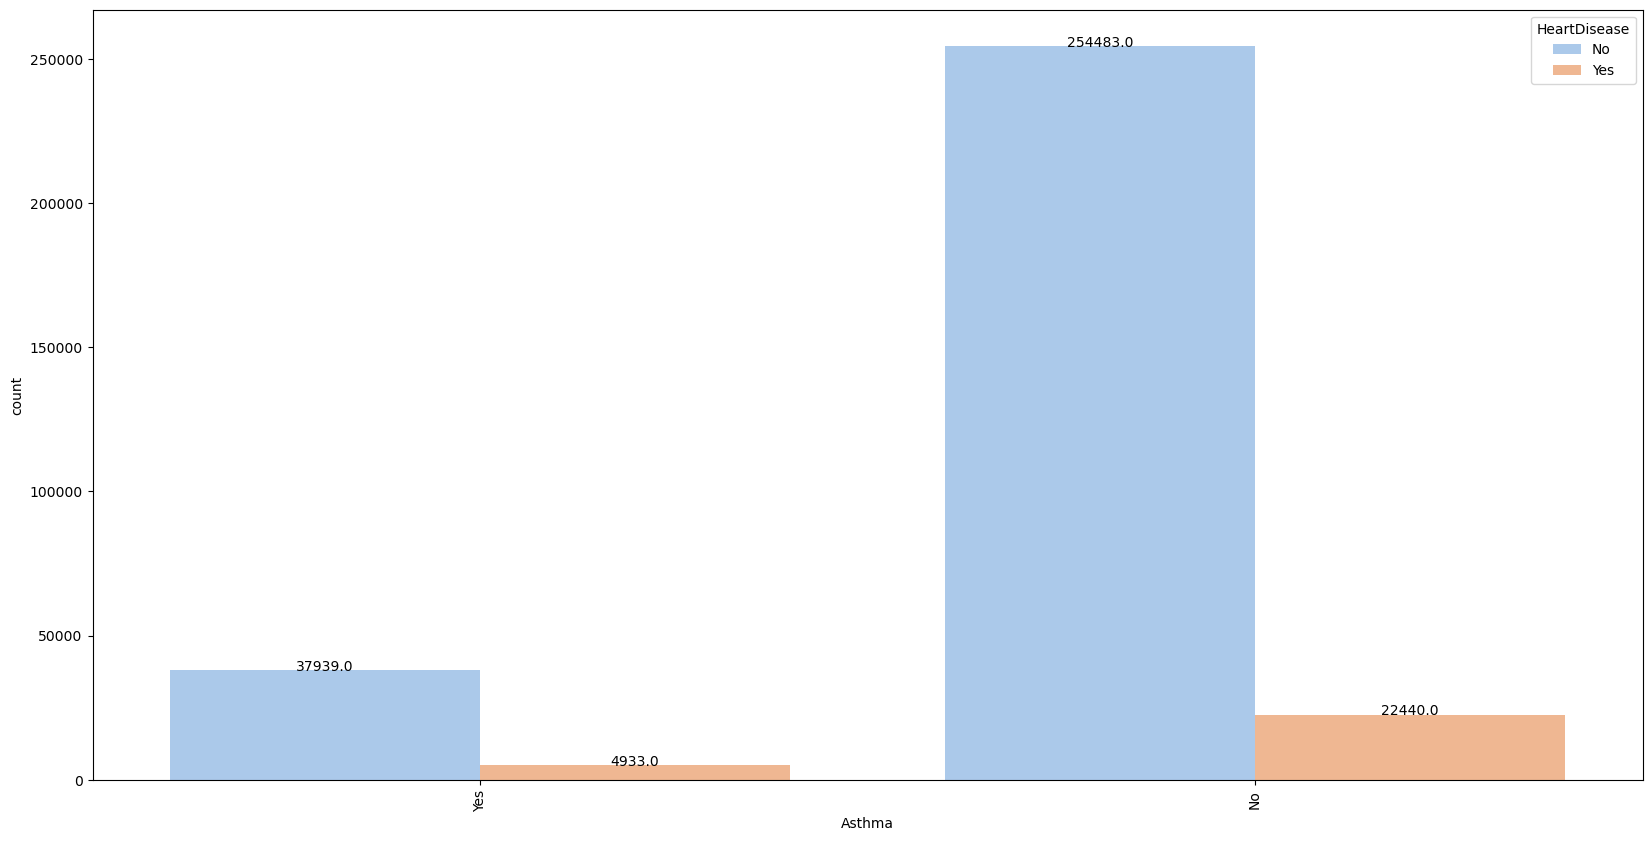

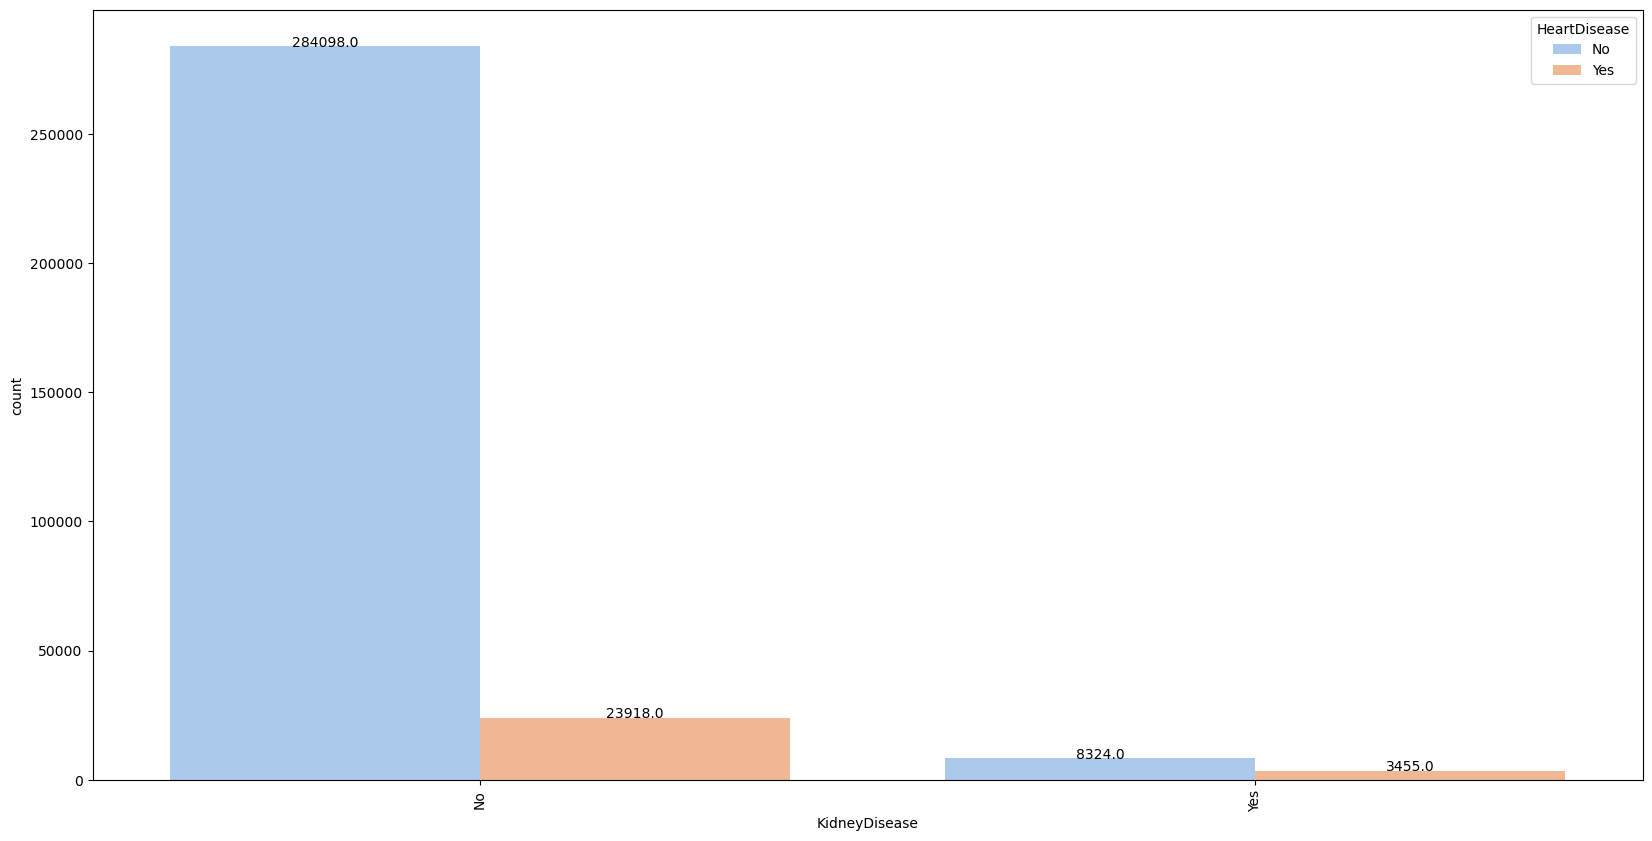

In [17]:
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(20,10))
  graph = sns.countplot(ax=ax1,x = feature , data = data1,hue='HeartDisease',palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

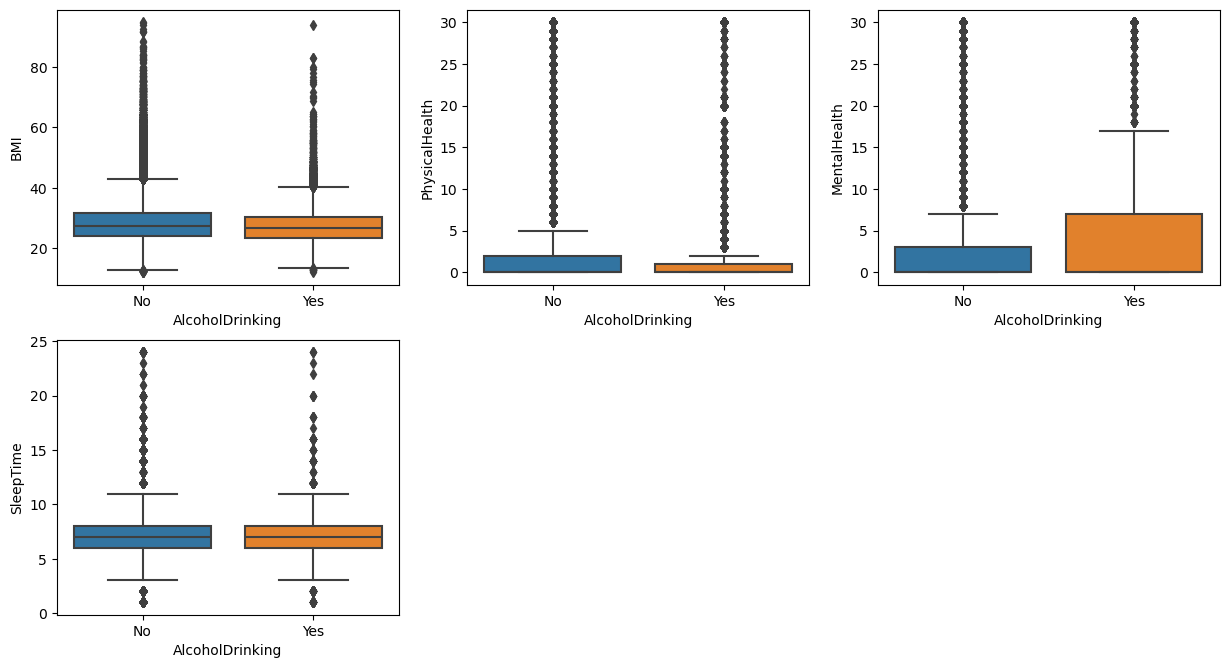

In [18]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=data[feature], x = data1['AlcoholDrinking'])
    i+=1

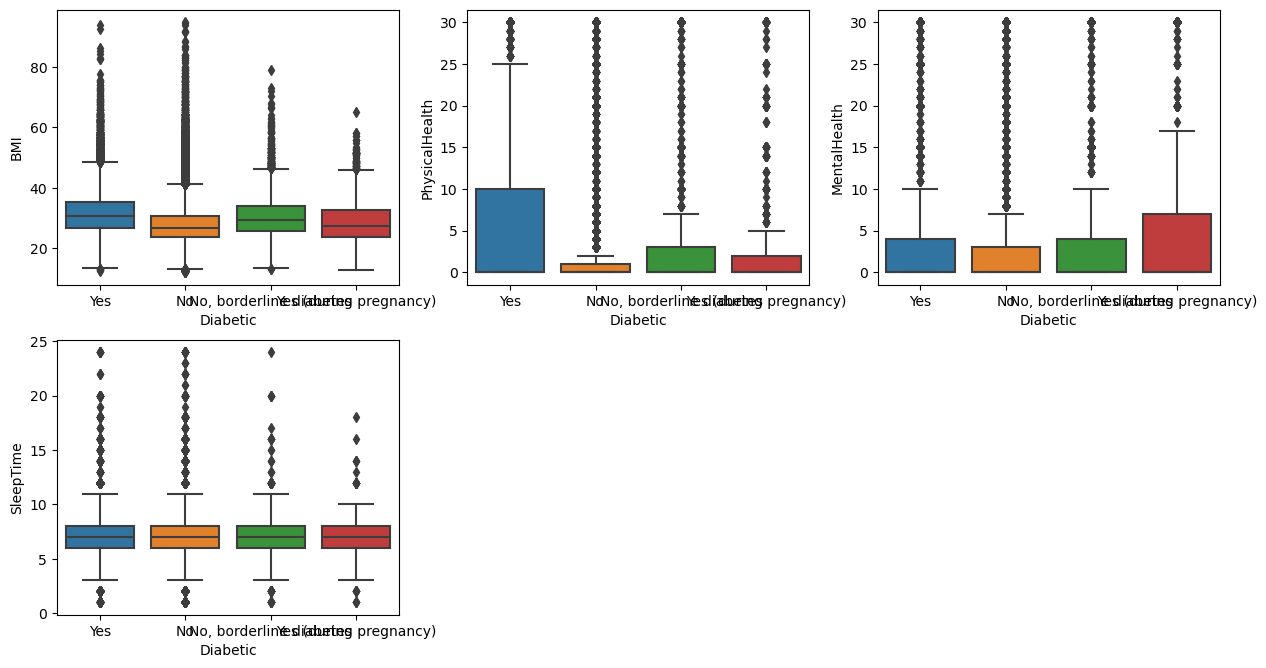

In [19]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=data[feature], x = data1['Diabetic'])
    i+=1

In [20]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(data1[categorical_features])
data1[categorical_features] = enc.transform(data1[categorical_features])

In [21]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
for feature in numeric_features:
	stat, p = shapiro(data1[feature])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

Statistics=0.928, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.476, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.551, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.892, p=0.000
Sample does not look Gaussian (reject H0)


In [22]:
from scipy.stats import chi2_contingency
# defining the table
for feature in categorical_features:
  stat, p, dof, expected = chi2_contingency(pd.crosstab(data1[feature],data1['HeartDisease']))
# interpret p-value
  alpha = 0.05
  print ( "p value is " + str (p))
  if p<=alpha:
    print ( 'Dependent (reject H0)' )
  else :
    print ( 'Independent (H0 holds true)' )

p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 1.892352227090306e-73
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 2.2386144306283177e-121
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)


In [23]:
correlation = data1.corr()
print(correlation['HeartDisease'].sort_values(ascending = False),'\n')

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64 



Index(['HeartDisease', 'AgeCategory', 'DiffWalking', 'Stroke',
       'PhysicalHealth', 'Diabetic', 'KidneyDisease', 'Smoking', 'Sex', 'BMI',
       'Asthma', 'MentalHealth', 'SleepTime', 'GenHealth', 'AlcoholDrinking',
       'PhysicalActivity'],
      dtype='object')


<Axes: >

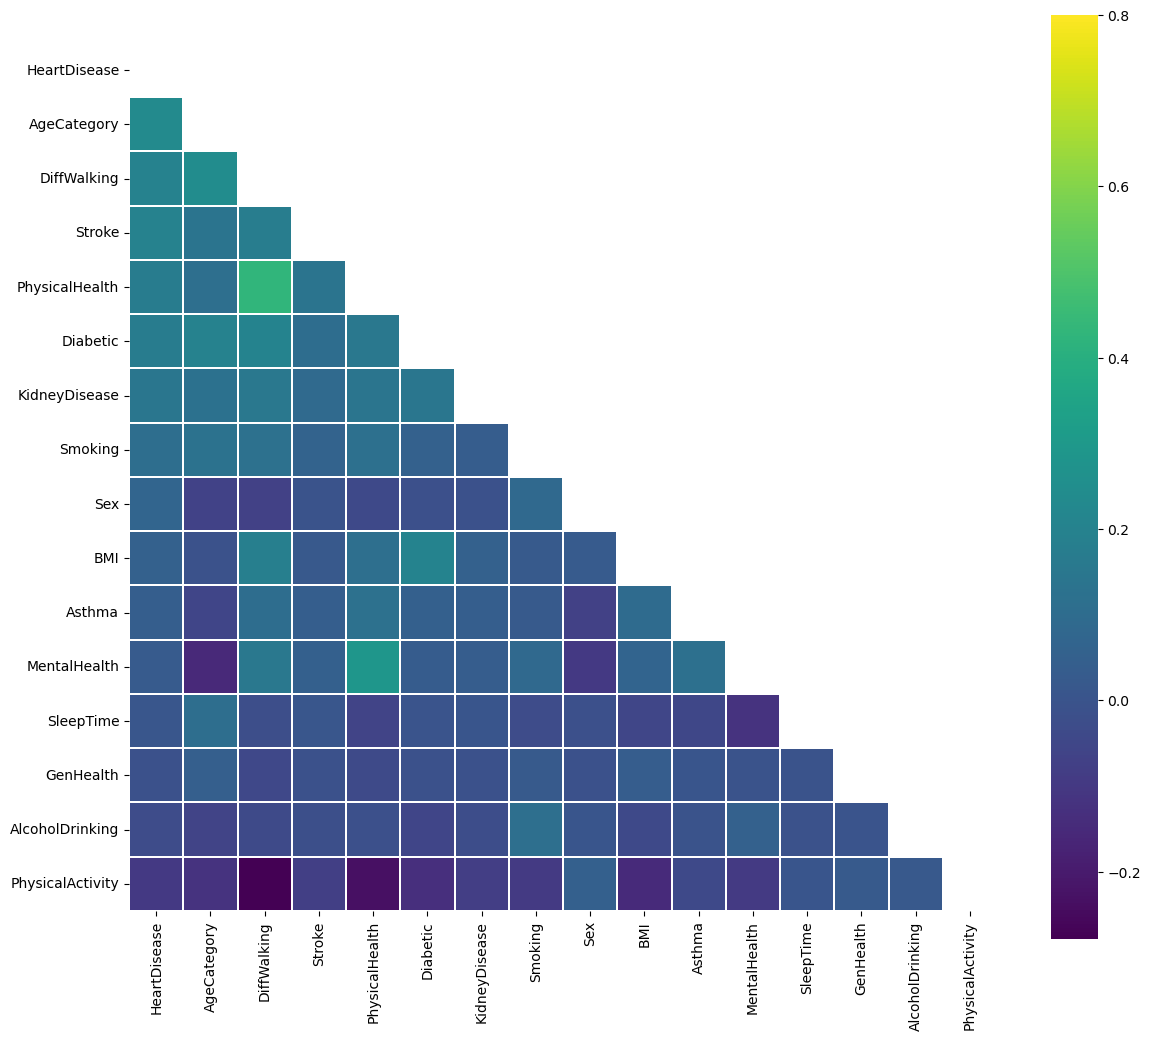

In [24]:
k= 18
cols = correlation.nlargest(k,'HeartDisease')['HeartDisease'].index
print(cols)
cm = np.corrcoef(data1[cols].values.T)
mask = np.triu(np.ones_like(data1.corr()))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [25]:
#Machine learning
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [26]:
y=data1['HeartDisease']
data1.drop('HeartDisease',axis=1,inplace=True)

In [27]:
X_train, X_test, y_train, y_test=train_test_split(data1,y,test_size=0.1,random_state=42)

In [28]:
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

In [29]:
models = [KNeighborsClassifier(), LogisticRegression(), XGBClassifier(),ExtraTreesClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    print(f'Recall_score: {recall_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print('-'*30, '\n')

model: KNeighborsClassifier()
Accuracy_score: 0.9037210756722952
Precission_score: 0.3507779349363508
Recall_score: 0.08647140864714087
F1-score: 0.13874125874125873
------------------------------ 

model: LogisticRegression()
Accuracy_score: 0.9116322701688555
Precission_score: 0.5444915254237288
Recall_score: 0.0896094839609484
F1-score: 0.1538922155688623
------------------------------ 

model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=na